# SIRSi-Vaccine Dynamical Model for the Covid-19 Pandemic repository

## URL

[https://github.com/dferruzzo/Covid-19-version2](https://github.com/dferruzzo/Covid-19-version2)

## Description
This repository includes databases of confirmed Covid-19 cases and data on social distancing obtained from the official website of [SEADE](https://www.seade.gov.br/coronavirus/). Additionally, the repository houses Python programs that process, prepare, and analyze the raw data using least squares fit, model prediction validation, and figure generation.

In this revision, I aimed to provide a more concise and clear overview of what the repository contains and what the Python programs do. I also tried to use more parallel structure to make the text easier to read.

The files that are part of the program include the functions:
* `show_data`, presents in a user-friendly way the data of confirmed cases and isolation rate used for processing.
* `loaddata`, loads the data corresponding to the chosen time window.
* `fit_isol`, produces the least squares fit for the isolation index.
* `fitting`, produces the least squares adjustment for data from confirmed cases of Covid-19.
* `validation`, performs a validation of the predictions generated by the model with adjusted parameters taking data in a later time window than the data used for the adjustment.
* `save_all`, saves tuning parameters and other statistical data in `csv` files for later use.
* `load_all`, loads the information previously saved in `csv` format for use.
* `produce_figs_param`, generates most of the figures used in the article. Not all figures produced are used in the article.
* `simulations`, produces simulations and figures and allows changing parameters such as the vaccination rate $ \omega $ and the isolation index $ \theta $. It is used to simulate different scenarios as proposed in the article.
* `bif_map`, produces a transcritical bifurcation map in parameter spaces $ (\omega,\theta) $ that shows the trade-off of stability between disease-free and endemic equilibria, as well as the contours of peak peaks of infected associates.

## Functionality
This notebook can be run directly in a `Codespace` here on `Github`.

Run this notebook to:
1. Load the data from the Covid-19 reported confirmed cases,
2. Load the Isolation index data, 
3. Produce parameter adjustment for both the isolation data and the model paramters,
2. Save the data produced in files for distribution and reproducibility,
3. Produce the plots,
4. For testing different scenarios.

In [1]:
# Load the libraries
from loaddata import *
from fit_isol import *
from fitting import *
from validation import *
from save_all import *
from load_all import *
from produce_figs_param import *
from omega_gamma import *
from simulations import *
from show_data import *
from bif_map import *
import pandas as pd

In [ ]:
# Show the raw data used
#show_data()

In [2]:
# Load the data for fitting and validation
data_for_fit, data_for_val = loaddata()

Carregando data...
Data loaded...OK!


In [ ]:
# Run the fitting for the isolation index
data_fit_isol = fit_isol(data_for_fit, order=1, save_figs=False)

In [ ]:
# Run the fit of the confirmed cases to get the model parameters
data_fit_dyn = fitting(data_fit_isol,\
                       data_for_fit,\
                       save_figs=False)
# Validates the model
validation(data_fit_isol,\
           data_fit_dyn,\
           data_for_fit,\
           data_for_val,\
           save_figs=False)

In [ ]:
# If output of the previous cell is satisfactory then saved all parameters on disk for future use
# Otherwise run the two previous cells above
filename_iso, filename_dyn = save_all(data_fit_isol,\
                                      data_fit_dyn,\
                                      show=False,\
                                      verify=False)

In [3]:
# Load the data ans parameters we use in the manuscript
csv1 = 'data_iso-2023-03-06-19-38-55.csv'
csv2 = 'data_dyn-2023-03-06-19-38-55.csv'
data_fit_isol_saved, data_fit_dyn_saved = load_all(csv1, csv2)


Loading data from file: data_iso-2023-03-06-19-38-55.csv

Loading data from file: data_dyn-2023-03-06-19-38-55.csv

Data loaded successfully...OK!



N = 62
tot_pop = 11869660
theta_t = 0.50064516 + 0.00025806·x


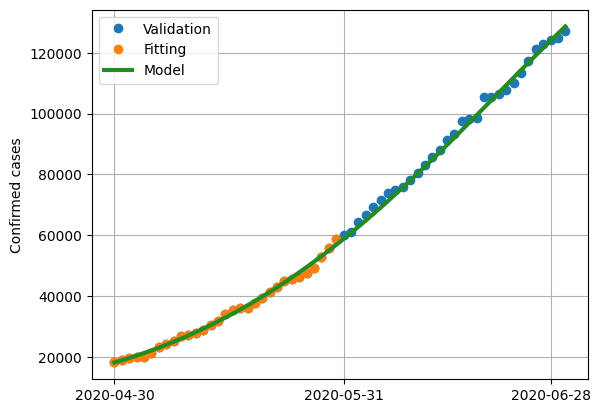

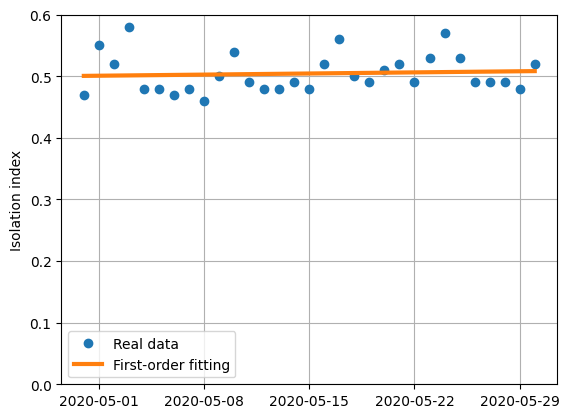

RMSE validation = 0.00010612109338681192


In [4]:
# Produce the figures
produce_figs_param(data_for_fit,\
                   data_for_val,\
                   data_fit_isol_saved,\
                   data_fit_dyn_saved,\
                   save_figs=False)



  omega = -m*theta+b
  theta critical = 0.5839603654983293
  omega min = 0.028074066113463084
  m = 0.048075293756461975
  b = 0.028074066113463084
  theta_test = 0.6
  omega(theta)= -0.000771110140414099




<Figure size 640x480 with 0 Axes>

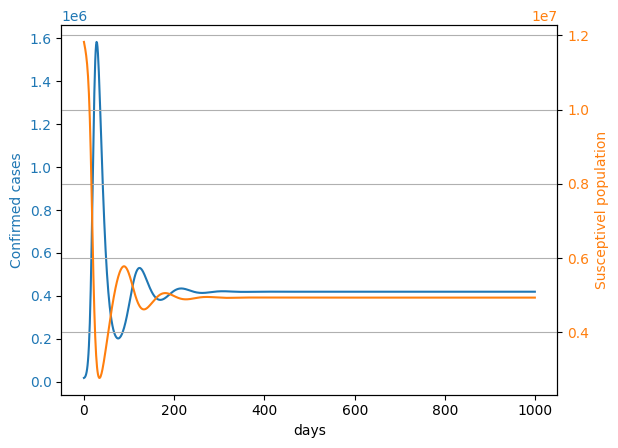

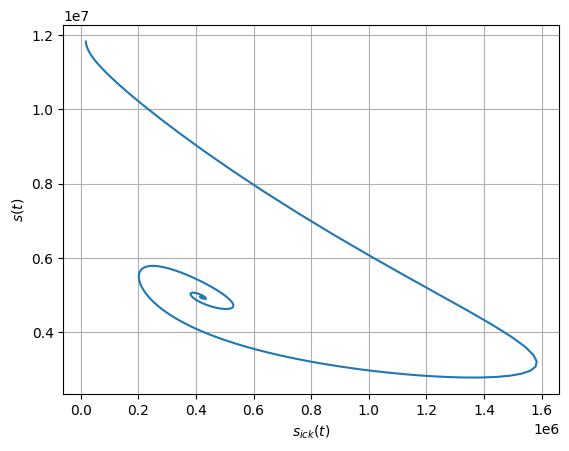

In [5]:
# Run simulations
simulations(data_for_fit,\
            data_for_val,\
            data_fit_isol_saved,\
            data_fit_dyn_saved,\
            save_figs=False)

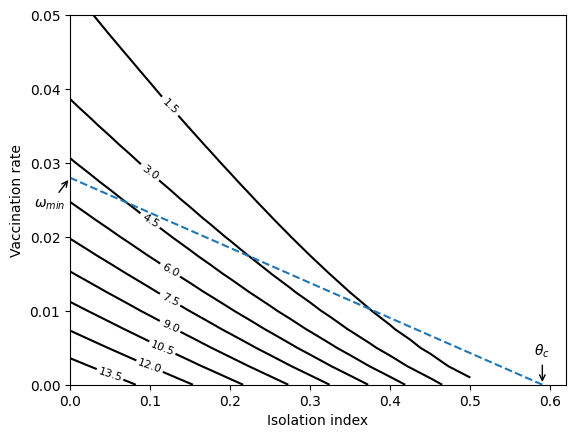

In [6]:
# Produce the bifurcation map, it takes a little while
bif_map(data_for_val,\
        data_fit_isol_saved,\
        data_fit_dyn_saved,\
        save_figs=False)